In [42]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from stardist import random_label_cmap
from stardist.models import StarDist2D
from skimage import io

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [43]:
def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    x =  (x - mi) / ( ma - mi + eps )
    
    return x

### Load and normalize all images in the folder

In [44]:
image_folder = './class1_images'
image_format = '.tif'
image_names = sorted(glob(image_folder + '/*' + image_format))

images = list(map(io.imread,image_names))

images_norm =  [normalize(x,1,99.8) for x in images]

### Load the model weights

In [45]:
model_name = 'CLASS1'
model_folder = 'weights'
model = StarDist2D(None, name=model_name, basedir=model_folder)

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.531088, nms_thresh=0.3.


### Apply the model to one image and plot the predicted labels

(0.0, 375.0)

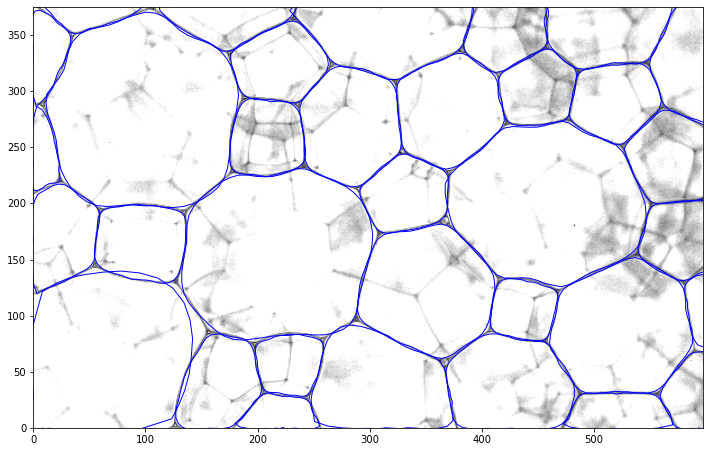

In [46]:
plot_image = images_norm[1]
labels, details = model.predict_instances(plot_image)

plt.figure(figsize=(12,15))
plt.imshow(plot_image,cmap='gray')
for coordinate in details['coord']:
    plt.fill(coordinate[1,:],coordinate[0,:],fill=False,edgecolor='b')
plt.xlim([0,plot_image.shape[1]])
plt.ylim([0,plot_image.shape[0]])